# Conversion Rate

Given user data from an e-commerce company, we are looking for patterns in the data that may yield useful information about whether a user will 'convert' (i.e. will make a purchase). Using this information, we will build a model that  predicts conversion rate and allows us to make recommendations to the product and marketing teams of the company in order to improve conversion rate.


#### Import relevant Python packages:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Load data as a pandas dataframe

In [13]:
df = pd.read_csv('conversion_data.csv')
df

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0


#### Check for missing values in the dataset

In [17]:
df.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

## Explore the data

There are no missing values in the dataset so we can proceed with exploring the data. The dataset includes several categorical variables: *country, source* and *new_user*. Using barplots and countplots, we can examine how these variables impact the conversation rate. 

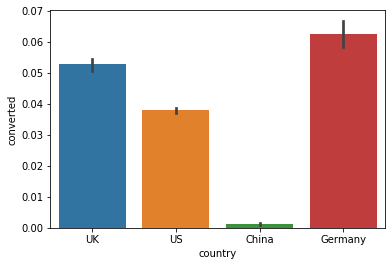

In [109]:
sns.barplot(x = 'country', y = 'converted', data = df)

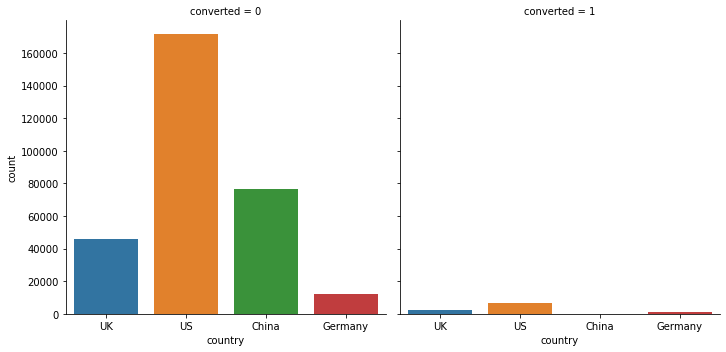

In [88]:
sns.catplot(x = 'country', col = 'converted', data = df, kind  = 'count')

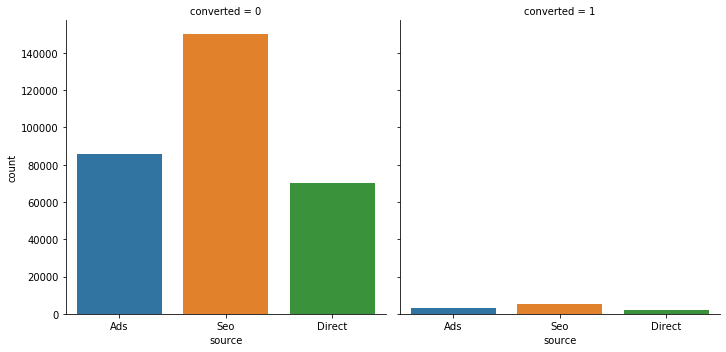

In [93]:
sns.catplot(x = 'source', col = 'converted', data = df, kind = 'count')

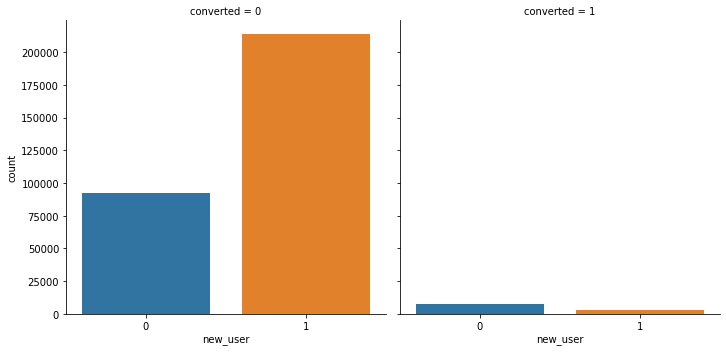

In [89]:
sns.catplot(x = 'new_user', col = 'converted', data = df, kind  = 'count')

From the above plots, we can make thee following possible conclusions:

1. The conversion rate in China appears to be rather low. On the other hand, the conversaion rate in Germany is substantially higher. However, there are currently relatively users in Germany. The biggest market is in the USA.
2. The marketing channel source does not, on its own, appear to impact conversion rate.
3. The majority of users in the dataset are new but most of these users do not 'convert' in their first session. 

There are also 2 continuous variables in the dataset that we can explore: *age* and *total_pages_visited*. 

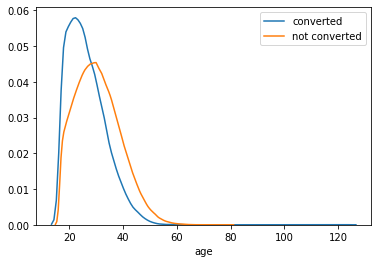

In [74]:
df_converted = df[df['converted']==1]
df_not_converted = df[df['converted']==0]
sns.distplot(df_converted['age'], hist = False, label = 'converted')
sns.distplot(df_not_converted['age'],hist = False, label = 'not converted')

Comparing how age is distributed between users that did and did not convert reveals that younger users are more likely to convert. 

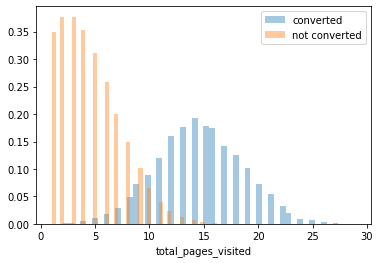

In [68]:
df_converted = df[df['converted']==1]
df_not_converted = df[df['converted']==0]
sns.distplot(df_converted['total_pages_visited'], kde = False, norm_hist = True, label = 'converted')
sns.distplot(df_not_converted['total_pages_visited'],kde = False, norm_hist = True,label = 'not converted')
plt.legend()

Additionally, users that visited more pages were also more likely to convert, as demonstrated in the distribution plot above.

It is surprising that the marketing channel source appeared to have little effect on whether a user 'converted' or not so I investigated the effect of marketing source on different user groups:

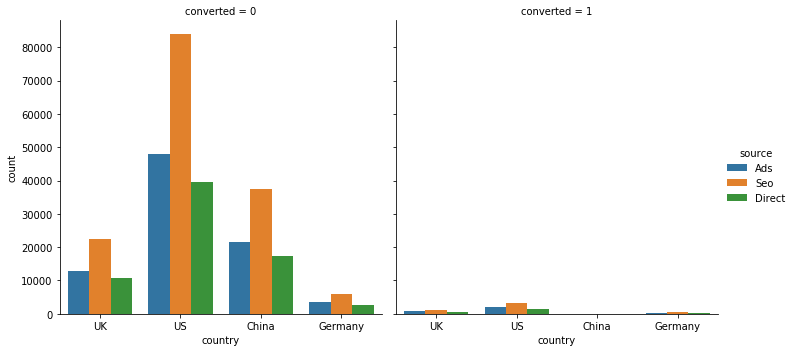

In [90]:
sns.catplot(x = 'country', col = 'converted', data = df, hue = 'source', kind = 'count')

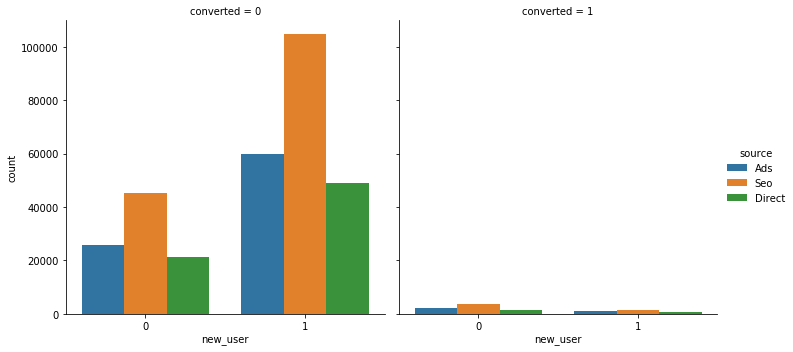

In [92]:
sns.catplot(x = 'new_user', col = 'converted', data = df, hue = 'source', kind  = 'count')

## Modelling the Data

Using these features, I will try and model the data in order to accurately predict conversion rate. Because we already have a labelled data set, I will build a supervised model. Becuase our output variable is discrete (either the users converted or they did not), I will use a classification algoithm. 

#### Deal with categorical variables

In [94]:
user_country = pd.get_dummies(df['country'],drop_first = True)
marketing_source = pd.get_dummies(df['source'],drop_first = True)

In [95]:
df = pd.concat([df,user_country,marketing_source],axis = 1)

#### Select columns from the dataframe and split the data into a training and a test set

In [97]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['country','source','converted'],axis=1), 
                                                    df['converted'], test_size=0.30, 
                                                    random_state=101)

#### Training and predicting

In [99]:
from sklearn.linear_model import LogisticRegression

In [106]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
predictions = logmodel.predict(X_test)

#### Evaluate

In [103]:
from sklearn.metrics import confusion_matrix, classification_report

In [108]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91871
           1       0.86      0.68      0.76      2989

    accuracy                           0.99     94860
   macro avg       0.92      0.84      0.87     94860
weighted avg       0.99      0.99      0.99     94860



In [110]:
print(confusion_matrix(y_test,predictions))

[[91535   336]
 [  967  2022]]
